# Read data into a pandas dataframe

In [1]:
import numpy as np
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Explore data

In [2]:
star_wars.head(10)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      
5                                                Yes                      
6                                                Yes                      
7                                                Yes                      
8                                                Yes                      
9                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    
6           Star Wars: Episode I  The Phantom Menace                                    
7           Star Wars: Episode I  The Phantom Menace                                    
8           Star Wars: Episode I  The Phantom Menace                                    
9           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   
6  Star Wars: Episode II  Attack of the Clones   
7  Star Wars: Episode II  Attack of the Clones   
8  Star Wars: Episode II  Attack of the Clones   
9  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   
6  Star Wars: Episode III  Revenge of the Sith   
7  Star Wars: Episode III  Revenge of the Sith   
8  Star Wars: Episode III  Revenge of the Sith   
9  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: 

In examining the data for strange values, we can see that row 0 is actually a second header row containing the choices for three different multiple choice questions, each of which may or may not contains an answer in each row. Row 2 is missing answers to many of the questions, with NaN in many columns. Household income sometimes has a NaN value. The question asking if the respondent is a Star Wars fan also has a lot of NaN values. 

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Remove rows where RespondentID is NaN

In [4]:
star_wars['RespondentID'] = star_wars[pd.notna(star_wars['RespondentID']) == True]

# Examine columns 1 and 2

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

There are lots of NaN values in the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column.

# Convert both columns to Booleans to make them easier to work with

In [7]:
# mapping dictionary
yes_no = {
    "Yes": True,
    "No": False
}

#convert both columns by applying dictionary
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      351
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

# Re-name the next 6 columns for easier analysis

In [10]:
# These columns are star_wars.columns[3:9]
# Convert values to Booleans

dict = {'Star Wars: Episode I  The Phantom Menace': True, 
        'Star Wars: Episode II  Attack of the Clones': True, 
        'Star Wars: Episode III  Revenge of the Sith': True, 
        'Star Wars: Episode IV  A New Hope': True, 
        'Star Wars: Episode V The Empire Strikes Back': True, 
        'Star Wars: Episode VI Return of the Jedi': True, 
        np.NaN: False}
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(dict)
star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map(dict)
star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map(dict)
star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map(dict)
star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map(dict)
star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map(dict)

In [11]:
# check the columns to make sure the conversion worked
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts(dropna=False)

True     674
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [12]:
# Rename the columns to something more user-friendly

star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                                     'Unnamed: 4': 'seen_2',
                                     'Unnamed: 5': 'seen_3',
                                     'Unnamed: 6': 'seen_4',
                                     'Unnamed: 7': 'seen_5',
                                     'Unnamed: 8': 'seen_6'})

In [13]:
# double-check column names

print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

# Clean up Star Wars Movie Ranking Columns

In [14]:
# Re-name ranking columns

star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                                     'Unnamed: 10': 'ranking_2',
                                     'Unnamed: 11': 'ranking_3',
                                     'Unnamed: 12': 'ranking_4',
                                     'Unnamed: 13': 'ranking_5',
                                     'Unnamed: 14': 'ranking_6'})

In [15]:
# Double check renamed columns

print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


In [16]:
# Convert columns to floats so they can be manipulated later

star_wars.iloc[1:, 9:15] = star_wars.iloc[1:, 9:15].astype('float')
star_wars.iloc[1:, 9:15]

ranking_1 ranking_2 ranking_3 ranking_4 ranking_5 ranking_6
1            3         2         1         4         5         6
2          NaN       NaN       NaN       NaN       NaN       NaN
3            1         2         3         4         5         6
4            5         6         1         2         4         3
5            5         4         6         2         1         3
6            1         4         3         6         5         2
7            6         5         4         3         1         2
8            4         5         6         3         2         1
9            5         4         6         2         1         3
10           1         2         3         4         5         6
11         NaN       NaN       NaN       NaN       NaN       NaN
12         NaN       NaN       NaN       NaN       NaN       NaN
13           3         4         5         6         1         2
14           4         5         6         2         3         1
15           4         2         5         3         1         6
16           4         6         5         3         1         2
17           4         1         2         3         5         6
18           1         2         3         4         5         6
19           6         5         2         3         1         4
20           6         5         1         4         3         2
21           6         5         4         1         2         3
22           3         4         5         1         2         6
23           6         5         4         3         1         2
24           6         1         4         2         3         5
25           1         2         6         3         4         5
26         NaN       NaN       NaN       NaN       NaN       NaN
27           4         6         5         2         3         1
28           6         5         4         2         3         1
29           6         5         4         2         1         3
30           4         6         5         2         1         3
...        ...       ...       ...       ...       ...       ...
1157         3         4         5         6         2         1
1158       NaN       NaN       NaN       NaN       NaN       NaN
1159         2         3         4         5         1         6
1160       NaN       NaN       NaN       NaN       NaN       NaN
1161         3         4         2         5         6         1
1162         3         4         5         6         1         2
1163         4         5         6         1         2         3
1164         5         6         2         1         4         3
1165         5         4         3         6         1         2
1166         5         6         4         3         1         2
1167         6         5         1         4         3         2
1168         3         4         5         6         1         2
1169       NaN       NaN       NaN       NaN       NaN       NaN
1170         4         5         6         3         1         2
1171       NaN       NaN       NaN       NaN       NaN       NaN
1172         6         2         1         5         3         4
1173         2         3         4         1         6         5
1174         5         3         6         4         2         1
1175         1         2         3         4         5         6
1176         1         3         4         6         2         5
1177         2         1         3         4         5         6
1178         1         2         3         4         5         6
1179       NaN       NaN       NaN       NaN       NaN       NaN
1180         3         4         5         6         1         2
1181         3         4         5         2         1         6
1182         5         4         6         3         2         1
1183         4         5         6         2         3         1
1184       NaN       NaN       NaN       NaN       NaN       NaN
1185         4         3         6         5         2         1
1186         6         1         2      

# Find highest ranked movie by taking mean of each column

In [17]:
ranking_mean = star_wars.iloc[1:, 9:15].mean()
ranking_mean.head

<bound method Series.head of ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64>

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

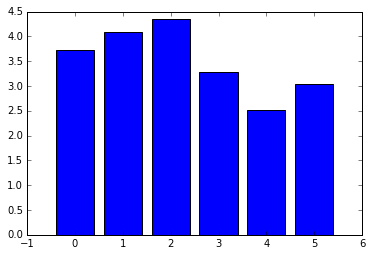

In [19]:
plt.bar(height=ranking_mean, left=range(6), y=0, align='center')
plt.show

In examining the mean score for each of the 6 Star Wars movies, where 1 is the best score and 5 the worst, it becomes apparent that Movie 5, The Empire Strikes Back, is the overall favorite of the survey respondents.

# Find out how many people have seen each movie by taking the sum of each 'seen' column

In [20]:
def sum_seen(col):
    sum = col.sum()
    return sum
seen_sums = star_wars.iloc[1:, 3:9].apply(sum_seen)

In [21]:
seen_sums

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<function matplotlib.pyplot.show>

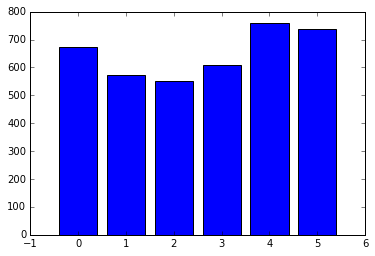

In [22]:
plt.bar(height=seen_sums, left=range(6), y=0, align='center')
plt.show                         

Analysis of the number of respondents that had seen each movie shows that The Emperor Strikes Back and Return of the Jedi were the top two movies seen, with The Phantom Menace coming in at third place.

## Examine how men responded vs. women

In [23]:
# Split data into two groups, male and female

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

<function matplotlib.pyplot.show>

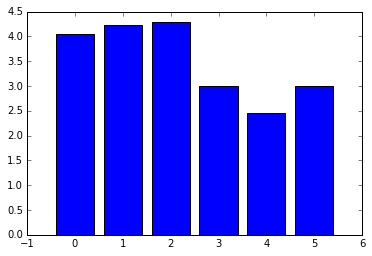

In [28]:
# Analyze mean score and total movies watched for males

male_rankings = males.iloc[1:, 9:15].mean()
male_sums = males.iloc[1:, 3:9].apply(sum_seen)

# visualize male average rank
plt.bar(height=male_rankings, left=range(6), y=0, align='center')
plt.show 

<function matplotlib.pyplot.show>

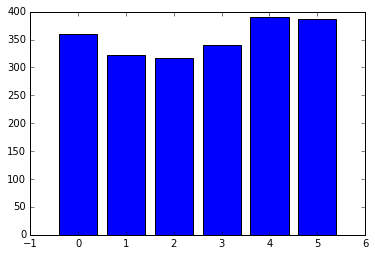

In [29]:
# visualize male total seen per movie
plt.bar(height=male_sums, left=range(6), y=0, align='center')
plt.show 

Men rated The Phantom Menace, Attack of the Clones, and Revenge of the Sith the highest. However, when looking at the totals who had seen each movie, the movies that were viewed the most were The Empire Strikes Back, Return of the Jedi, and The Phantom Menace. So more men viewed the classic movies, but they did not rate them as well as the newer trilogy.

<function matplotlib.pyplot.show>

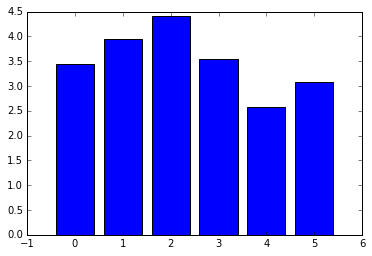

In [30]:
# Analyze mean score and total movies watched for females

female_rankings = females.iloc[1:, 9:15].mean()
female_sums = females.iloc[1:, 3:9].apply(sum_seen)

#visualize female rankings
plt.bar(height=female_rankings, left=range(6), y=0, align='center')
plt.show 

<function matplotlib.pyplot.show>

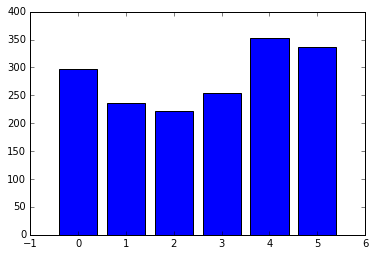

In [31]:
# visualize female total seen per movie
plt.bar(height=female_sums, left=range(6), y=0, align='center')
plt.show 

Examination of female rankings and sum total seen per movie, the same trend emerges. Females ranked The Phantom Menace, Attack of the Clones, and Revenge of the Sith the highest, taking the first three places in the rankings. However, they also had seen the same three movies the most: The Phantom Menace, The Empire Strikes Back, and Return of the Jedi.